# Drug Consumption Prediction: Cocaine, Heroin, and Methamphetamines, Nicotine 
## Overview
* Encode drug frequency feature as an ordinal feature
* Perform feature engineering to create target labels for drugs of interest

# Getting Started
## Understanding the Dataset
Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.

| Feature     | Description                                                           |
| ----------- | -----------------------------------                                   |
| ID          | Identification                                                        |
| Age         | Age range of participant                                              |
| Gender      | Male or Female                                                        |
| Education   | Level of education                                                    |
| Country     | Country of orgin                                                      |
| Ethnicity   | Ethnicity/Race of participant                                         |
| Nscore      | Quantified NEO Five-Factor Inventory Neuroticism score                |
| Escore      | Quantified NEO Five-Factor Inventory Extraversion score               |
| Oscore      | Quantified NEO Five-Factor Inventory Openness to experience score     |
| Ascore      | Quantified NEO Five-Factor Inventory Agreeableness score              |
| Cscore      | Quantified NEO Five-Factor Inventory Conscientiousness score          |
| Impulsive   | Quantified BIS-11 impulsiveness score                                 |
| SS          | Quantified Impulsive Sensation Seeking score                          |
| Drug        | Various drugs were examined and measured in terms of frequency of use |

## Packages and Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

pd.set_option('max_columns', None)

## Load Data

In [2]:
data = pd.read_csv('../input/drug-consumptions-uci/Drug_Consumption_Quantified.csv')
data = data.drop('ID', axis=1)
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


# Data Cleaning

In [3]:
# Check for missing values
data.isna().sum().sum()

0

In the description of data, we are told that Semer is a fake drug that is used as a control. Since it is not a real drug those who claimed to have used Semer are assumed to be over claimers. We can not be sure these individuals have accurately recounted their drug use, therefore, we will remove these individuals from the data frame.

In [4]:
print(f'Original shape of data with {data.shape[0]} rows and {data.shape[1]} columns')

Original shape of data with 1884 rows and 31 columns


In [5]:
# Overclaimers
data.query("Semer != 'CL0'")

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
726,-0.07854,0.48246,-1.73790,-0.09765,-0.31685,-0.58016,0.32197,0.14143,-0.60633,0.12331,1.29221,0.76540,CL6,CL2,CL2,CL2,CL6,CL6,CL5,CL2,CL2,CL2,CL2,CL2,CL0,CL4,CL2,CL6,CL6,CL2,CL2
816,-0.95197,-0.48246,-0.61113,-0.09765,-0.50212,-0.67825,1.74091,0.72330,0.13136,0.41594,0.88113,1.92173,CL3,CL0,CL0,CL0,CL6,CL4,CL5,CL0,CL0,CL3,CL0,CL0,CL0,CL5,CL0,CL5,CL4,CL3,CL0
1515,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,-0.80615,-1.27553,-1.34289,-1.92173,-0.71126,0.07987,CL0,CL2,CL3,CL2,CL3,CL4,CL1,CL3,CL2,CL1,CL2,CL1,CL2,CL1,CL2,CL4,CL2,CL3,CL1
1532,-0.95197,0.48246,-0.61113,-0.57009,0.11440,-0.46725,0.80523,0.29338,2.03972,1.81175,-1.37983,-0.21575,CL5,CL6,CL0,CL4,CL6,CL3,CL6,CL4,CL0,CL4,CL0,CL4,CL3,CL2,CL0,CL3,CL4,CL4,CL3
1697,0.49788,0.48246,0.45468,-0.57009,-0.31685,1.98437,-0.80615,2.15324,0.76096,-0.00665,1.29221,1.92173,CL6,CL0,CL0,CL3,CL5,CL6,CL4,CL2,CL0,CL2,CL0,CL2,CL2,CL2,CL0,CL2,CL6,CL2,CL0
1768,-0.95197,-0.48246,-1.22751,-0.57009,-0.22166,-0.34799,1.28610,1.06238,-0.01729,-0.52745,0.52975,1.22470,CL4,CL3,CL0,CL3,CL6,CL6,CL6,CL0,CL0,CL3,CL0,CL4,CL3,CL6,CL3,CL3,CL3,CL1,CL3
1805,-0.95197,0.48246,-1.43719,-0.57009,-0.31685,1.23461,1.11406,1.06238,-1.47955,0.12331,0.88113,1.92173,CL4,CL3,CL0,CL2,CL6,CL6,CL3,CL5,CL2,CL4,CL2,CL1,CL4,CL1,CL0,CL1,CL6,CL1,CL2
1822,-0.95197,0.48246,0.45468,-0.57009,-0.31685,0.22393,-0.30033,0.88309,1.28610,-0.00665,0.88113,0.07987,CL4,CL0,CL0,CL2,CL5,CL6,CL5,CL2,CL0,CL0,CL0,CL0,CL2,CL3,CL0,CL3,CL5,CL2,CL0


In [6]:
# We will drop overclaimers since, there answers might not truly be accurate
data = data.drop(data[data['Semer'] != 'CL0'].index)

# We will also drop unnecesary columns
data = data.drop(['Choc','Semer'], axis=1)
data = data.reset_index(drop=True)

In [7]:
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0


# Feature Encoding

In [8]:
drugs = ['Alcohol',
         'Amyl',
         'Amphet',
         'Benzos',
         'Caff',
         'Cannabis',
         'Coke',
         'Crack',
         'Ecstasy',
         'Heroin',
         'Ketamine',
         'Legalh',
         'LSD',
         'Meth',
         'Mushrooms',
         'Nicotine',
         'VSA'    ]

In [9]:
def drug_encoder(x):
    if x == 'CL0':
        return 0
    elif x == 'CL1':
        return 1
    elif x == 'CL2':
        return 2
    elif x == 'CL3':
        return 3
    elif x == 'CL4':
        return 4
    elif x == 'CL4':
        return 5
    elif x == 'CL5':
        return 6
    else:
        return 7

In [10]:
for column in drugs:
    data[column] = data[column].apply(drug_encoder)

In [11]:
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,6,2,2,0,7,4,3,0,4,0,2,0,2,3,0,4,0
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,7,0,0,0,7,3,0,0,0,0,0,0,0,0,1,0,0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,6,2,2,0,0,0,2,0,0,0,0,2,0
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,7,3,0,0,1,0,0,1,0,0,2,2,0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,2,0,0,0,7,0,0,0,0,0,0,0,0,0,0,7,0


<AxesSubplot:>

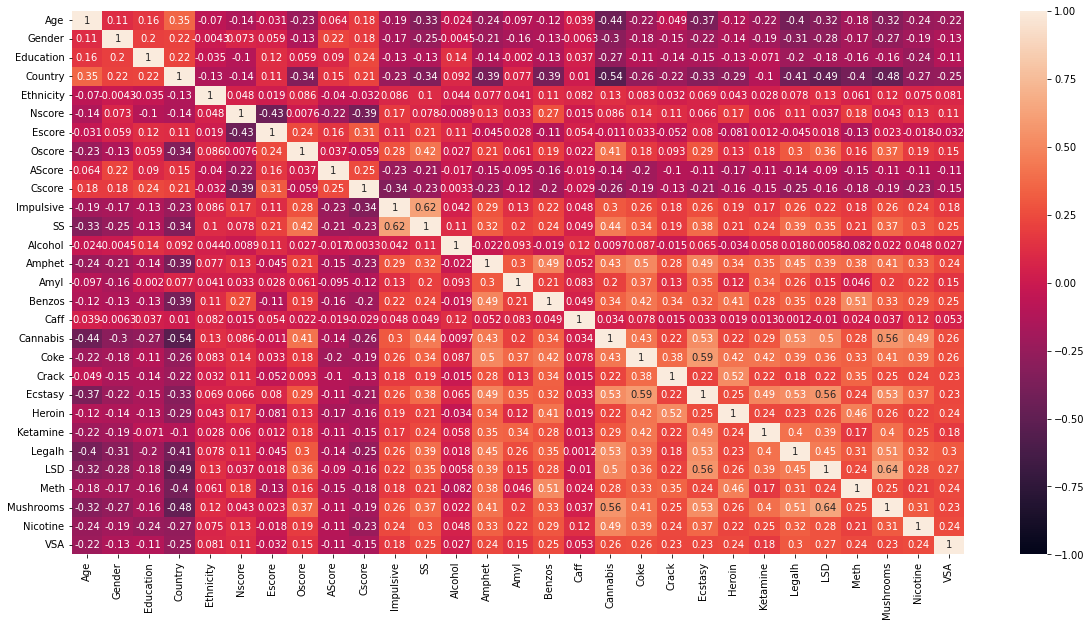

In [12]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, vmin=-1)

In [13]:
low_corr = ['Age', 'Gender', 'Education', 'Alcohol','AScore','Caff']
for column in low_corr:
    data = data.drop(column, axis=1)
data.head()

,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575,2,2,0,4,3,0,4,0,2,0,2,3,0,4,0
1,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.01450,-1.37983,0.40148,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0
2,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.58489,-1.37983,-1.18084,0,0,3,2,2,0,0,0,2,0,0,0,0,2,0
3,0.96082,-0.31685,0.73545,-1.63340,-0.45174,1.30612,-0.21712,-0.21575,1,1,0,3,0,0,1,0,0,1,0,0,2,2,0
4,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,1.63088,-1.37983,-1.54858,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0


In [14]:
print(f'In the new dataframe there are {data.shape[0]} rows and {data.shape[1]} columns')

In the new dataframe there are 1876 rows and 23 columns


# Feature Engineering
We will create three seperate datasets to asses predict whether an indivudal uses cocaine, methamphetamines, or heroin.

In [15]:
# Combine cocaine and crack cocaine usage into one feature
cocaine_df = data.copy()
cocaine_df['coke_user'] = cocaine_df['Coke'].apply(lambda x: 0.5 if x not in [0,1] else 0)
cocaine_df['crack_user'] = cocaine_df['Coke'].apply(lambda x: 0.5 if x not in [0,1] else 0)
cocaine_df['both_user'] = cocaine_df[['coke_user', 'crack_user']].iloc[:].sum(axis=1)
cocaine_df['Cocaine_User'] = cocaine_df['both_user'].apply(lambda x: 1 if x > 0 else 0)
cocaine_df = cocaine_df.drop(['coke_user', 'crack_user', 'both_user' ], axis=1)

In [16]:
meth_df = data.copy()
meth_df['Meth_User'] = meth_df['Meth'].apply(lambda x: 1 if x not in [0,1] else 0)
meth_df = meth_df.drop(['Meth'], axis=1)

In [17]:
heroin_df = data.copy()
heroin_df['Heroin_User'] = heroin_df['Heroin'].apply(lambda x: 1 if x not in [0,1] else 0)
heroin_df = heroin_df.drop(['Heroin'], axis=1)

In [18]:
nic_df = data.copy()
nic_df['Nicotine_User'] = nic_df['Nicotine'].apply(lambda x: 1 if x not in [0,1] else 0)
nic_df = nic_df.drop(['Nicotine'], axis=1)

In [19]:
cocaine_df.head(1)

,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Cocaine_User
0,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575,2,2,0,4,3,0,4,0,2,0,2,3,0,4,0,1


In [20]:
meth_df.head(1)

,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Mushrooms,Nicotine,VSA,Meth_User
0,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575,2,2,0,4,3,0,4,0,2,0,2,0,4,0,1


In [21]:
heroin_df.head(1)

,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Heroin_User
0,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575,2,2,0,4,3,0,4,2,0,2,3,0,4,0,0


In [22]:
nic_df.head(1)

,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,VSA,Nicotine_User
0,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575,2,2,0,4,3,0,4,0,2,0,2,3,0,0,1


# Data Preprocessing

In [23]:
def preprocessing_inputs(df, column):
    df = df.copy()
    
    # Split df into X and y
    y = df[column]
    X = df.drop(column, axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), 
                           index=X_train.index, 
                           columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), 
                          index=X_test.index, 
                          columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test
    

In [24]:
def plot_confusion_matrix(y,y_predict):
    #Function to easily plot confusion matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues');
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['non-user', 'user']); ax.yaxis.set_ticklabels(['non-user', 'user'])

# Cocaine

## Model Training

In [25]:
X_train, X_test, y_train, y_test = preprocessing_inputs(cocaine_df, 'Cocaine_User')

In [26]:
X_train.head()

,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
1604,0.866265,0.575283,0.125548,1.298214,-0.993606,-0.000636,-0.231800,-0.215230,-0.201117,0.330440,0.678958,-0.496131,-0.740193,-0.343283,-0.769730,-0.343207,-0.446023,-0.729376,-0.697845,-0.486933,-0.790515,-0.909071,0.549579
58,0.866265,-0.033985,-0.476068,-1.253935,-1.293555,-0.136881,-1.437385,-1.598342,-0.704747,-0.565871,-0.748757,-1.237733,-0.740193,-0.343283,-0.769730,-0.343207,-0.446023,-0.729376,-0.697845,-0.486933,-0.790515,-1.259072,-0.432982
1215,-1.323122,-0.033985,1.008192,0.970188,0.279177,-0.893717,0.906948,0.425285,0.806145,-0.565871,2.582579,0.987071,1.108235,-0.343283,0.925711,1.542547,-0.446023,0.807950,-0.697845,3.258704,0.528476,1.190939,1.532139
1361,-1.323122,-0.033985,0.213171,-1.791890,0.432018,-1.380275,-1.437385,-0.869641,-0.704747,-0.565871,-0.748757,0.245470,-0.740193,-0.343283,0.925711,-0.343207,1.898724,2.345275,1.187090,1.653431,1.187971,-0.559069,-0.432982
771,-1.323122,-0.033985,0.125548,-0.451375,-0.864302,-0.000636,-0.744161,-1.598342,2.820669,-0.565871,2.582579,0.987071,0.492093,1.935142,0.360564,2.485424,-0.446023,-0.729376,0.558778,3.258704,0.528476,1.190939,-0.432982


In [27]:
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (1500, 23) (1500,)
Test set: (376, 23) (376,)


In [28]:
models = {
            '     Logisitc Regression': LogisticRegression(),
            '        Ridge Classifier': RidgeClassifier(),
            ' Support Vector Machines': SVC(),
            'Random Forest Classifier': RandomForestClassifier()}

In [29]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

     Logisitc Regression trained.
        Ridge Classifier trained.
 Support Vector Machines trained.
Random Forest Classifier trained.


## Model Results

In [30]:
print('                  ACCURACY')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')
print('                  F1 SCORES')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = f1_score(y_test, yhat, pos_label=1)
    print(name + ' F1-Score: {:.5}'.format(f1))

                  ACCURACY
     Logisitc Regression Accuracy: 100.00%
        Ridge Classifier Accuracy: 99.20%
 Support Vector Machines Accuracy: 99.73%
Random Forest Classifier Accuracy: 100.00%
---------------------------------------------
                  F1 SCORES
     Logisitc Regression F1-Score: 1.0
        Ridge Classifier F1-Score: 0.98885
 Support Vector Machines F1-Score: 0.99631
Random Forest Classifier F1-Score: 1.0


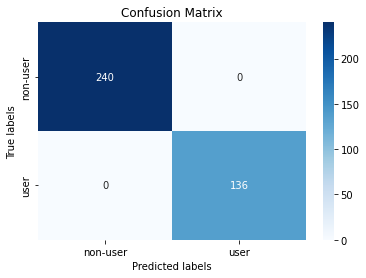

In [31]:
#Confusion Matrix of Best Peforming Model
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
plot_confusion_matrix(y_test, yhat)

# Methamphetamine

## Model Training

In [32]:
X_train, X_test, y_train, y_test = preprocessing_inputs(meth_df, 'Meth_User')

In [33]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

     Logisitc Regression trained.
        Ridge Classifier trained.
 Support Vector Machines trained.
Random Forest Classifier trained.


## Model Results

In [34]:
print('                  ACCURACY')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')
print('                  F1 SCORES')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = f1_score(y_test, yhat, pos_label=1)
    print(name + ' F1-Score: {:.5}'.format(f1))

                  ACCURACY
     Logisitc Regression Accuracy: 84.84%
        Ridge Classifier Accuracy: 85.37%
 Support Vector Machines Accuracy: 84.57%
Random Forest Classifier Accuracy: 85.64%
---------------------------------------------
                  F1 SCORES
     Logisitc Regression F1-Score: 0.6014
        Ridge Classifier F1-Score: 0.60432
 Support Vector Machines F1-Score: 0.56716
Random Forest Classifier F1-Score: 0.625


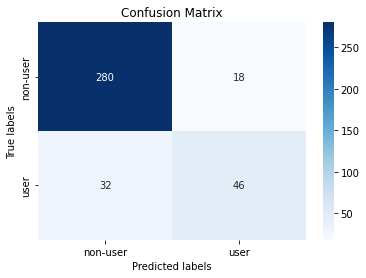

In [35]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
plot_confusion_matrix(y_test, yhat)

# Heroin

## Model Training

In [36]:
X_train, X_test, y_train, y_test = preprocessing_inputs(heroin_df, 'Heroin_User')

In [37]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

     Logisitc Regression trained.
        Ridge Classifier trained.
 Support Vector Machines trained.
Random Forest Classifier trained.


## Model Results

In [38]:
print('                  ACCURACY')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')
print('                  F1 SCORES')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = f1_score(y_test, yhat, pos_label=1)
    print(name + ' F1-Score: {:.5}'.format(f1))

                  ACCURACY
     Logisitc Regression Accuracy: 90.96%
        Ridge Classifier Accuracy: 90.16%
 Support Vector Machines Accuracy: 91.76%
Random Forest Classifier Accuracy: 90.96%
---------------------------------------------
                  F1 SCORES
     Logisitc Regression F1-Score: 0.54054
        Ridge Classifier F1-Score: 0.46377
 Support Vector Machines F1-Score: 0.56338
Random Forest Classifier F1-Score: 0.54054


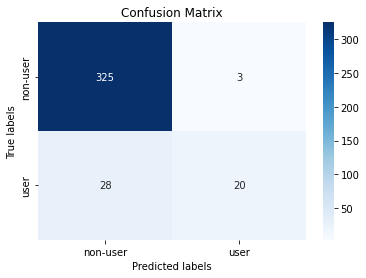

In [39]:
model = SVC()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
plot_confusion_matrix(y_test, yhat)

# Nicotine

## Model Training

In [40]:
X_train, X_test, y_train, y_test = preprocessing_inputs(nic_df, 'Nicotine_User')

In [41]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

     Logisitc Regression trained.
        Ridge Classifier trained.
 Support Vector Machines trained.
Random Forest Classifier trained.


## Model Results

In [42]:
print('                  ACCURACY')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')
print('                  F1 SCORES')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = f1_score(y_test, yhat, pos_label=1)
    print(name + ' F1-Score: {:.5}'.format(f1))

                  ACCURACY
     Logisitc Regression Accuracy: 78.46%
        Ridge Classifier Accuracy: 78.46%
 Support Vector Machines Accuracy: 79.79%
Random Forest Classifier Accuracy: 79.52%
---------------------------------------------
                  F1 SCORES
     Logisitc Regression F1-Score: 0.83636
        Ridge Classifier F1-Score: 0.83636
 Support Vector Machines F1-Score: 0.84861
Random Forest Classifier F1-Score: 0.85049


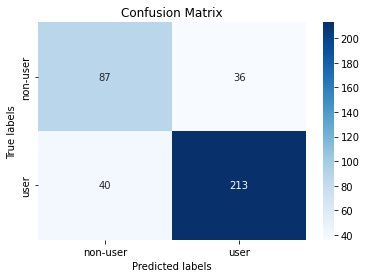

In [43]:
model = SVC()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
plot_confusion_matrix(y_test, yhat)

# Conclusions
* Overall we see that our Logistic Regression, Random Forest Classifiers, and SVM's performed the best. The models performed best when classifying Cocaine and Nicotine. Although, this is probably due to the much larger sample size from these drugs compared to Heroin.
* For further analysis you can check out my full EDA notebook [here](https://www.kaggle.com/obeykhadija/drug-consumptions-eda)